In [2]:
#1.Data Collection: Obtain a dataset containing customer information, purchase history, and relevant data.
import pandas as pd
csv_file_path = 'ifood_df.csv'
dataset = pd.read_csv(csv_file_path)
print("Original Dataset:")
print(dataset.head())
customer_information = dataset
print("\nCustomer Information:")
print(customer_information.head())
purchase_history = dataset
print("\nPurchase History:")
print(purchase_history.head())

Original Dataset:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  

In [3]:
#2.Data Exploration and Cleaning: Explore the dataset, understand its structure, and handleany missing or inconsistent data.
import pandas as pd
csv_file_path = 'ifood_df.csv'
dataset = pd.read_csv(csv_file_path)
print("Dataset Info:")
print(dataset.info())
print("\nSummary Statistics:")
print(dataset.describe())
print("\nMissing Values:")
print(dataset.isnull().sum())
dataset.fillna(0, inplace=True)
categorical_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
                        'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
dataset[categorical_columns] = dataset[categorical_columns].astype(int)
print("\nCleaned Dataset:")
print(dataset.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Accepte

In [4]:
#3.Descriptive Statistics: Calculate key metrics such as average purchase value, frequency ofpurchases
import pandas as pd
csv_file_path = 'ifood_df.csv'
dataset = pd.read_csv(csv_file_path)
average_purchase_values = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
frequency_of_purchases = dataset[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
print("Average Purchase Values:")
print(average_purchase_values)
print("\nFrequency of Purchases:")
print(frequency_of_purchases)

Average Purchase Values:
MntWines            306.164626
MntFruits            26.403175
MntMeatProducts     165.312018
MntFishProducts      37.756463
MntSweetProducts     27.128345
MntGoldProds         44.057143
dtype: float64

Frequency of Purchases:
NumDealsPurchases       5112
NumWebPurchases         9042
NumCatalogPurchases     5833
NumStorePurchases      12841
dtype: int64


Number of Customers in Each Cluster:
Cluster
2    994
3    473
0    463
1    275
Name: count, dtype: int64


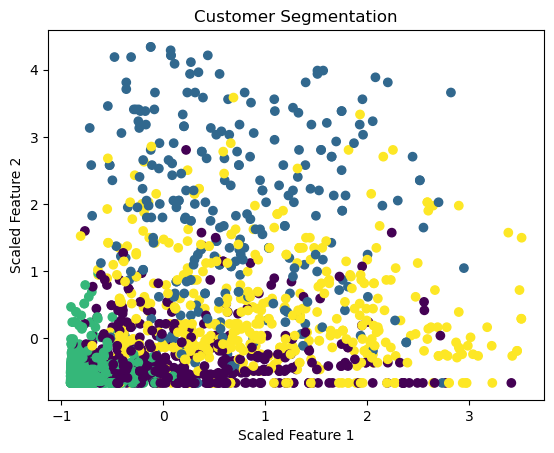

In [5]:
#4.Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segmentcustomers based on behavior and purchase patterns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
csv_file_path = 'ifood_df.csv'
dataset = pd.read_csv(csv_file_path)
X = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)
print("Number of Customers in Each Cluster:")
print(dataset['Cluster'].value_counts())
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dataset['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()

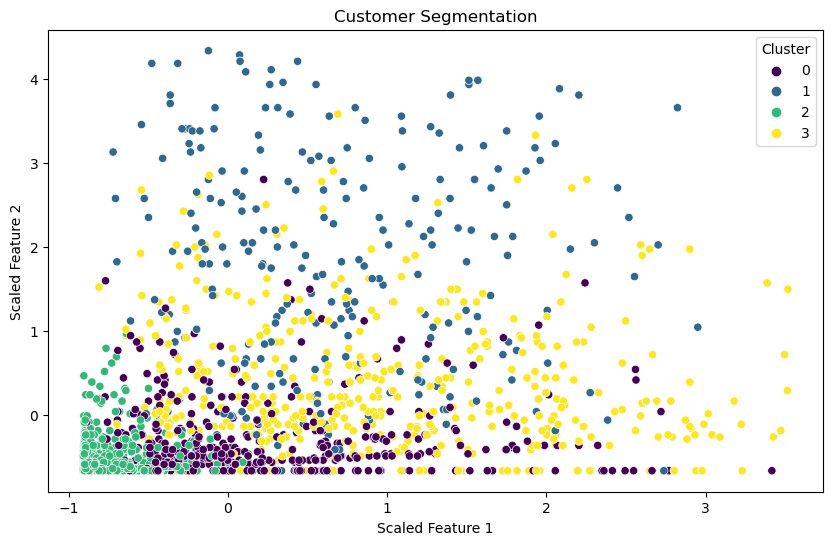

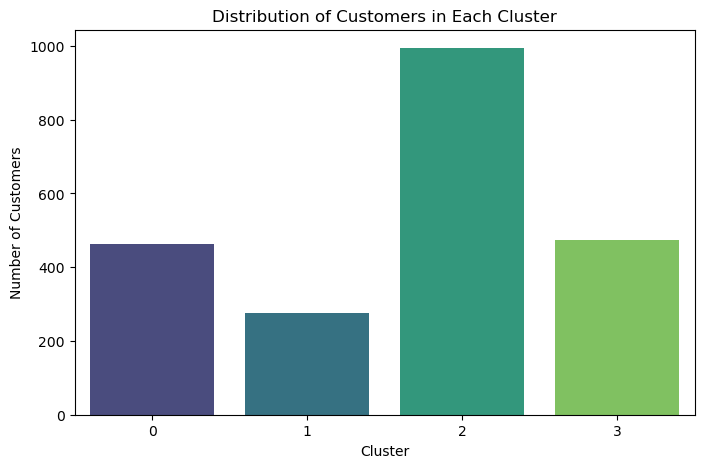

In [6]:
#5.Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customersegments
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
csv_file_path = 'ifood_df.csv'
dataset = pd.read_csv(csv_file_path)
X = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dataset['Cluster'], palette='viridis', legend='full')
plt.title('Customer Segmentation')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=dataset, palette='viridis')
plt.title('Distribution of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

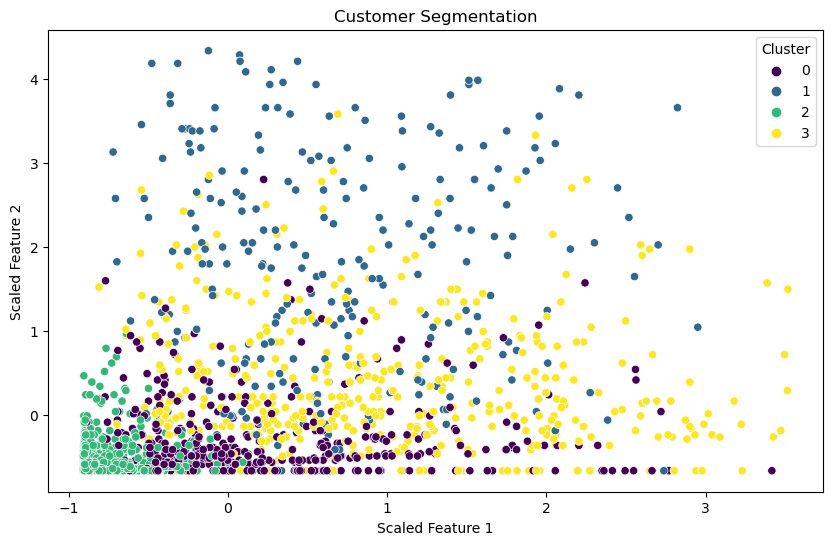

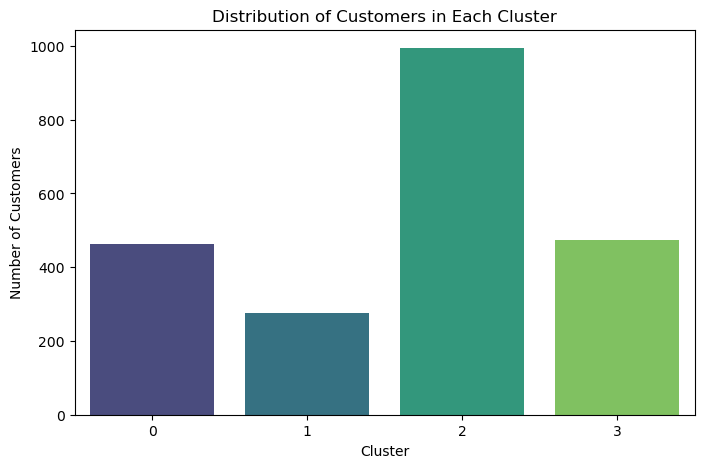


Insights for Cluster 0:
Income                  53282.518359
Kidhome                     0.403888
Teenhome                    0.874730
Recency                    48.075594
MntWines                  402.596112
MntFruits                  14.671706
MntMeatProducts           109.723542
MntFishProducts            19.809935
MntSweetProducts           16.000000
MntGoldProds               57.855292
NumDealsPurchases           4.518359
NumWebPurchases             6.455724
NumCatalogPurchases         2.423326
NumStorePurchases           6.842333
NumWebVisitsMonth           6.658747
AcceptedCmp3                0.086393
AcceptedCmp4                0.138229
AcceptedCmp5                0.012959
AcceptedCmp1                0.030238
AcceptedCmp2                0.019438
Complain                    0.006479
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.161987
Age                        54.066955
Customer_Days            2587.801296
marital_Divor

In [7]:
#6.Insights and Recommendations: Analyze characteristics of each segment and provideinsights
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = 'ifood_df.csv'
dataset = pd.read_csv(csv_file_path)

X = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dataset['Cluster'], palette='viridis', legend='full')
plt.title('Customer Segmentation')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=dataset, palette='viridis')
plt.title('Distribution of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
cluster_means = dataset.groupby('Cluster').mean()
for cluster in range(num_clusters):
    print(f"\nInsights for Cluster {cluster}:")
    print(cluster_means.loc[cluster])